In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Example with the class RegressionNN defined in classyNN.py

In [2]:
import classyNN
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = "/home/simone/repos/IPAM2021_ML/datasets/GSTLAL_EarlyWarning_Dataset/Dataset/m1m2Mc/"

In [4]:
NN = classyNN.RegressionNN(Nfeatures=3, hlayers_sizes=(100,))
NN.load_train_dataset(path=path, fname_x='xtrain.csv', fname_y='ytrain.csv')
#NN.print_info()

No output-intervals specified, using MinMaxScaler


In [5]:
NN.train(verbose=False, epochs=10)
#NN.plot_history()

In [6]:
NN.load_test_dataset(path=path, fname_x='xtest.csv', fname_y='ytest.csv') 
NN.print_metrics()


Final loss     : 0.00924
Final R2 mean  : 0.83620
R2[ 0]         : 0.72916
R2[ 1]         : 0.77956
R2[ 2]         : 0.99988


In [7]:
# compute prediction. If you want to remove the normalization, i.e. 
# to have the prediction in physical units, then use 
# inverse_transform=True (default is False, so that NN.compute_prediction()
# is the same of model.prediction() in TF)
prediction = NN.compute_prediction(NN.xtest, transform_output=True)

In [8]:
# Prediction on single array (the correct shape of the input is handled in compute_prediction)

print('Reasonable input:')
m1  = 1.3
m2  = 1.2
Mc  = (m1*m2)**(3/5)/(m1+m2)**(1/5)
pred_test = NN.compute_prediction([m1,m2,Mc], transform_output=True, transform_input=True)
print('input     :', np.array([[m1,m2,Mc]]))
print('prediction:', pred_test)
print('-'*60)

print('Crazy input:')
m1  = 100
m2  = -1
Mc  = -3
pred_test = NN.compute_prediction([m1,m2,Mc], transform_output=True, transform_input=True)
print('input     :', np.array([[m1,m2,Mc]]))
print('prediction:', pred_test)

Reasonable input:
input     : [[1.3        1.2        1.08714321]]
prediction: [[1.31034406 1.19252424 1.08657731]]
------------------------------------------------------------
Crazy input:
input     : [[100  -1  -3]]
prediction: [[1.8394394 1.6662805 1.4657167]]


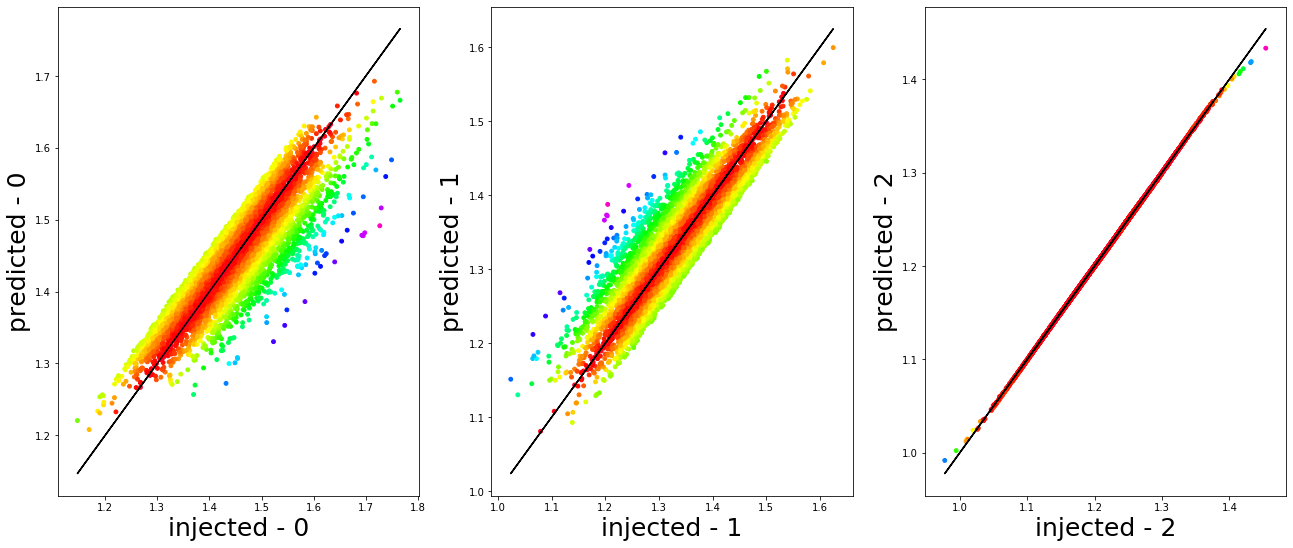

In [9]:
NN.plot_predictions(NN.xtest)

## NN with hard-constraints

In [10]:
# here the key-aspect is out_interval! See the ouput with a 'crazy' input in the next cell
out_intervals = [[1,2.2],[1,1.8],[0.9,1.6]]

NNhc = classyNN.RegressionNN(Nfeatures=3, hlayers_sizes=(100,), out_intervals=out_intervals)

NNhc.load_train_dataset(path=path, fname_x='xtrain.csv', fname_y='ytrain.csv')

NNhc.train(verbose=False, epochs=10)

NNhc.load_test_dataset(path, fname_x='xtest.csv', fname_y='ytest.csv') 

In [11]:
print('-'*70,'NN: Neural Network withou hard-constraints (i.e. MinMaxScaler)','-'*70, sep='\n', end='')
NN.print_metrics()
print('-'*70,'NNhc: hard-constraints','-'*70, sep='\n', end='')
NNhc.print_metrics()

----------------------------------------------------------------------
NN: Neural Network withou hard-constraints (i.e. MinMaxScaler)
----------------------------------------------------------------------
Final loss     : 0.00924
Final R2 mean  : 0.83620
R2[ 0]         : 0.72916
R2[ 1]         : 0.77956
R2[ 2]         : 0.99988
----------------------------------------------------------------------
NNhc: hard-constraints
----------------------------------------------------------------------
Final loss     : 0.00457
Final R2 mean  : 0.83488
R2[ 0]         : 0.72594
R2[ 1]         : 0.77970
R2[ 2]         : 0.99900


In [12]:
print('Reasonable input:')
m1  = 1.3
m2  = 1.2
Mc  = (m1*m2)**(3/5)/(m1+m2)**(1/5)
pred_test = NNhc.compute_prediction([m1,m2,Mc], transform_output=True, transform_input=True)
print('input     :', np.array([[m1,m2,Mc]]))
print('prediction:', pred_test)
print('-'*60)

print('Crazy input:')
m1  = 100
m2  = -1
Mc  = -3
pred_test = NNhc.compute_prediction([m1,m2,Mc], transform_output=True, transform_input=True)
print('input     :', np.array([[m1,m2,Mc]]))
print('prediction:', pred_test)

Reasonable input:
input     : [[1.3        1.2        1.08714321]]
prediction: [[1.29816033 1.19926872 1.08447696]]
------------------------------------------------------------
Crazy input:
input     : [[100  -1  -3]]
prediction: [[2.2 1.8 1.6]]


## Using results of the new code for 'old' modules like fancyplots.py

In [13]:
import sys
sys.path.insert(0, '/home/simone/repos/IPAM2021_ML/utils')   
import fancyplots as fp

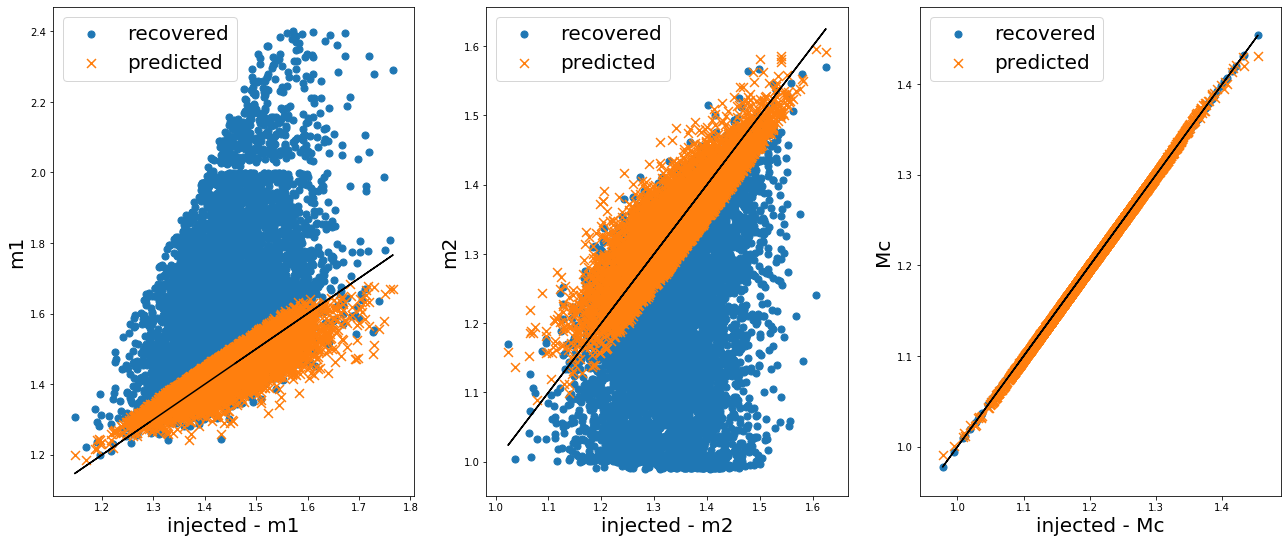

In [14]:
prediction = NNhc.compute_prediction(NNhc.xtest) # normalized prediction

fp.checkRegressionPlot(NNhc.xtest, NNhc.ytest, prediction, ['m1','m2','Mc'], \
                       scaler_y=NNhc.scaler_y, scaler_x=NNhc.scaler_x)

#fp.plotInjRecPred(NN.ytest_notnorm, NN.xtest_notnorm, NN.scaler_y.inverse_transform(prediction), idx_Mc=2)